In [1]:
import numpy as np

# Model
def model(x, p1, p2):
    return p1 + p2*x

# Data
Xs = np.arange(100)
Ys = np.arange(100) 

# Parameters
P1s = np.arange(10)
P2s = np.arange(20)

# Lost function
def cost(xs, ys, p1s, p2s):
    xs_b = xs[np.newaxis, :, np.newaxis]
    p2s_b = p2s[np.newaxis, np.newaxis, :]
    p1s_b = p1s[:, np.newaxis, np.newaxis]
    ys_b = ys[np.newaxis, :, np.newaxis]
    return np.mean( (ys_b - model(xs_b, p1s_b, p2s_b ))**2, axis=1 )

In [2]:
cost(Xs, Ys, P1s, P2s).shape

(10, 20)

In [3]:
import matplotlib.pyplot as plt

In [4]:
x = np.random.normal(loc=[-1, 1], scale=[0.5, 0.5], size=(1000,2))
y = np.sin(x)

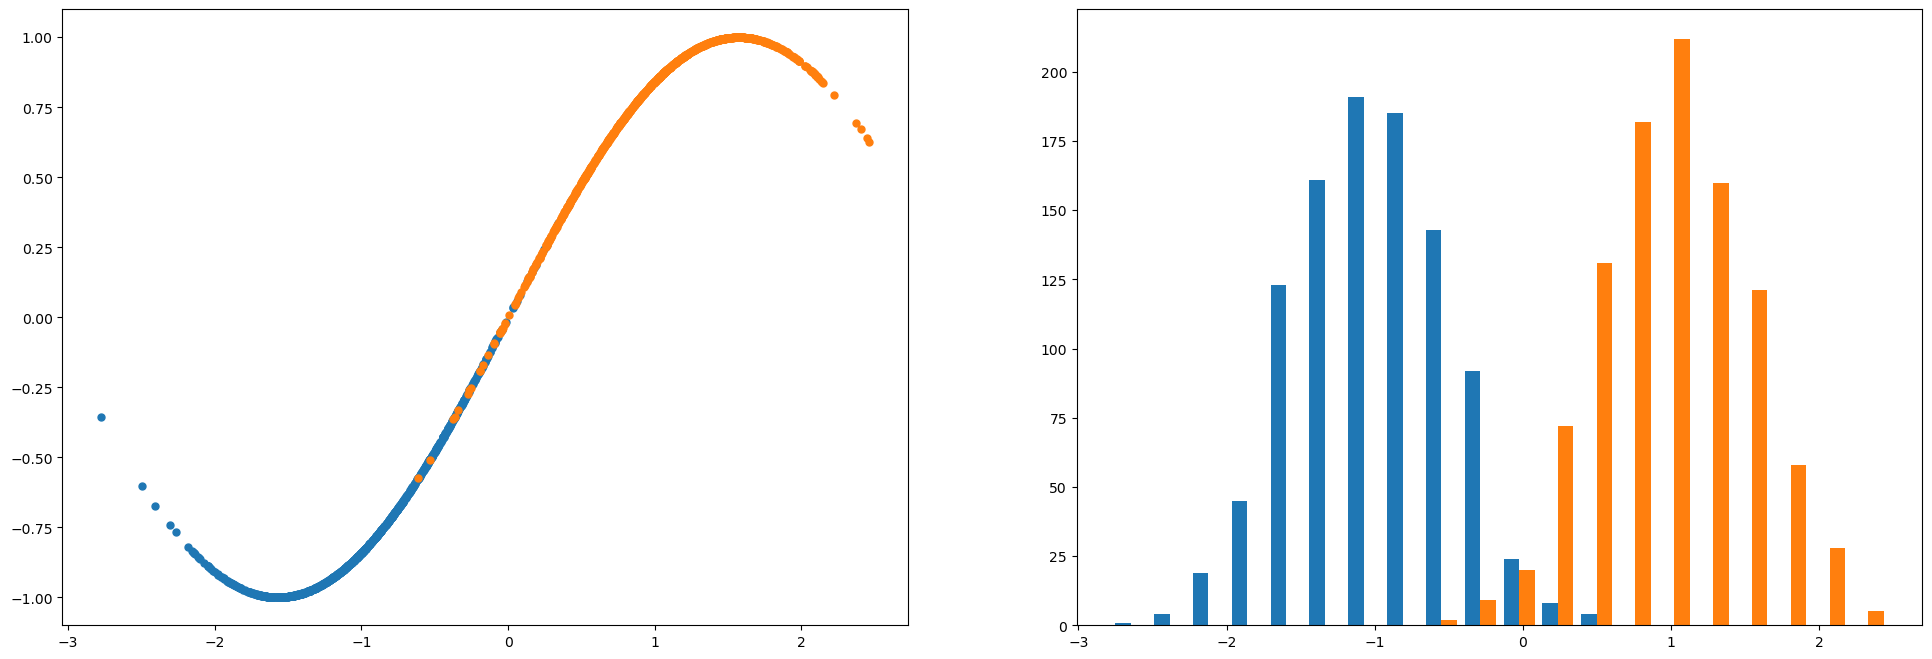

In [5]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1) # 121 means 1 line, 2 column, 1st plot
plt.plot(x, y, marker='o', markersize=5, linewidth=0.0)
plt.subplot(1, 2, 2) # 122 means 1 line, 2 column, 2nd plot
plt.hist(x, bins=20);

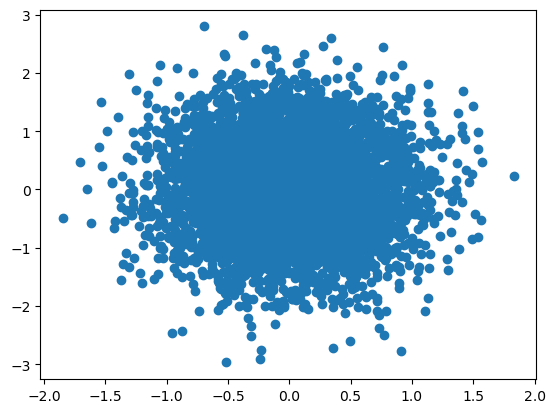

In [6]:
points = np.random.normal(loc=[0, 0], scale=[0.5, 0.8], size=(5000,2))
x, y = points[:, 0], points[:, 1]
plt.scatter(x,y);

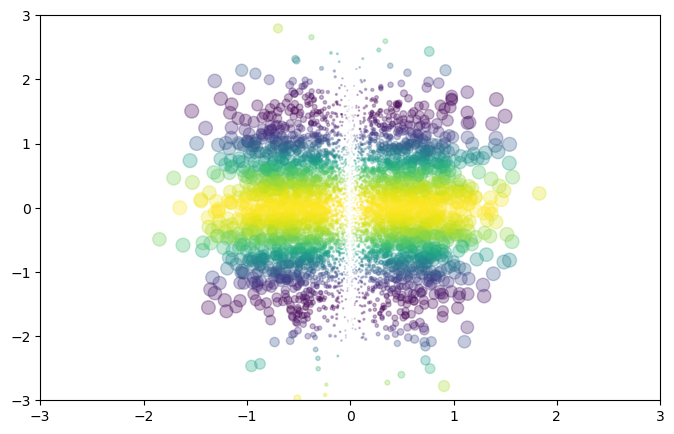

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=100*(np.sin(x))**2, c=100*(np.cos(y))**2, marker='o', alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [8]:
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 2])
data_trans = data + r0

In [9]:
xi, yi, zi = data[:,0], data[:,1], data[:,2]
xf, yf, zf = data_trans[:,0], data_trans[:,1], data_trans[:,2]

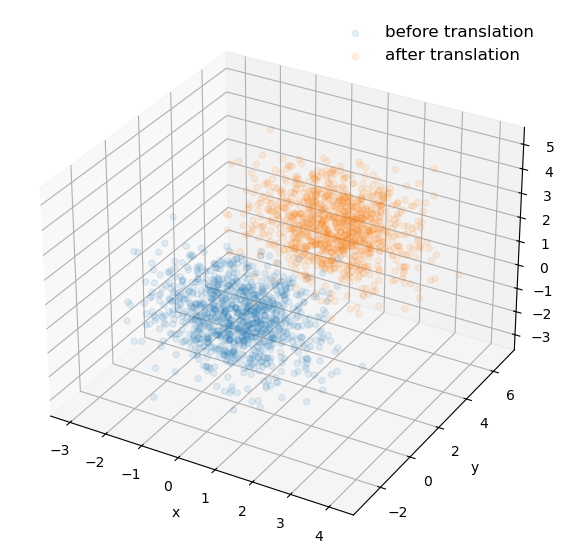

In [10]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(xi, yi, zi, alpha=0.1, label='before translation')
ax.scatter3D(xf, yf, zf, alpha=0.1, label='after translation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(frameon=False, fontsize=12);

In [11]:
def my_surface(x, y):
    x0 = 5*np.sin(y)
    sigma = 5+y
    amp = (10-y)
    return amp*np.exp(-(x-x0)**2/sigma**2)

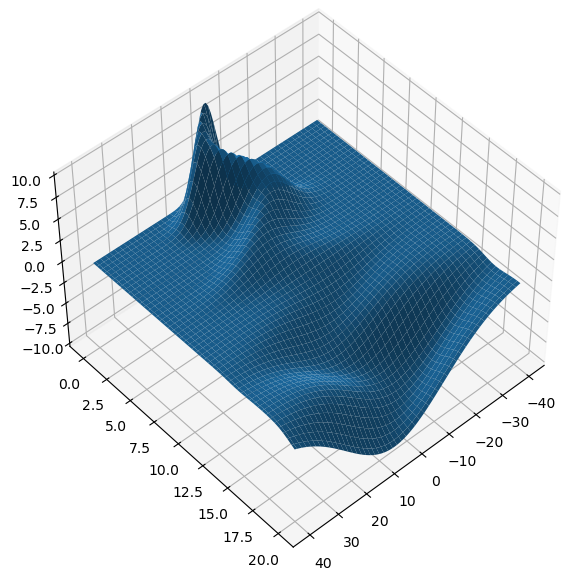

In [12]:
# Meshgrid and function application (see after for more details)
x = np.linspace(-40, 40, 100)
y = np.linspace(0, 20, 200)
xx, yy = np.meshgrid(x, y)
Z = my_surface(xx, yy)

# Plotting
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z)

# Choose the default view
ax.view_init(azim=48, elev=48);

In [13]:
import pandas as pd
df = pd.read_csv('WaveData.csv')
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [14]:
df.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000
mean,1.041140,1.891779,5.412332,8.794887,97.395310,23.207409
std,4.485922,4.580826,4.739317,5.358859,28.782966,9.813377
min,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.838000,1.410000,4.974000,7.286000,85.000000,21.900000
50%,1.129000,1.900000,5.525000,8.881000,99.000000,23.950000
75%,1.542000,2.600000,6.162000,10.663250,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


(1.0, 15.0)

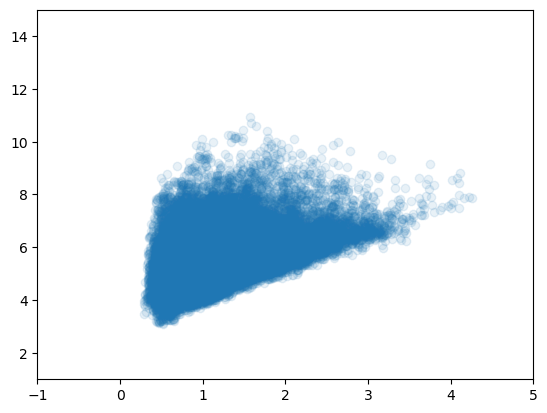

In [15]:
plt.scatter(df.Hs, df['Tz'], alpha=0.1);
plt.xlim(-1, 5)
plt.ylim(1, 15)

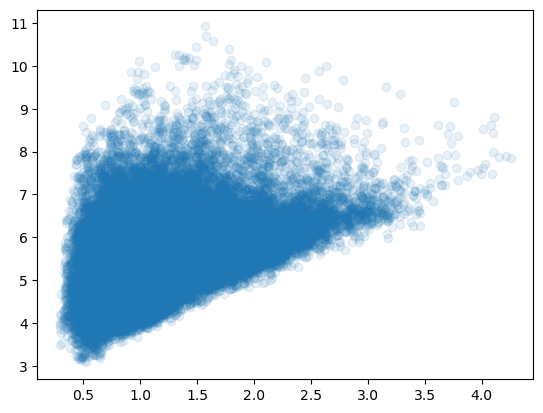

In [16]:
dfclean = df[df!=-99.9]
plt.scatter(dfclean.Hs, dfclean['Tz'], alpha=0.1);

In [17]:
dfclean

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,NaN,NaN
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


In [18]:
# Rename columns names using df.rename() function
old_new_cols = {
    'Date/Time': 'date',
    'Hs': 'height',
    'Hmax': 'heightMax',
    'Tz': 'period',
    'Tp': 'energy',
    'Peak Direction': 'direction',
    'SST': 'temperature'
}

# The argument `inplace` means the current dataframe is overwritten with the change
df.rename(columns=old_new_cols, inplace=True)
df.head()

,date,height,heightMax,period,energy,direction,temperature
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [19]:
df = pd.read_csv('WaveData.csv')
df2 = df.rename(columns=old_new_cols)
df2

,date,height,heightMax,period,energy,direction,temperature
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


In [20]:
def model_temp(h, p):
    return h**2 + p/(h+1)


df2['TempModel'] = model_temp(df2['height'], df2['period'])
dfclean = df2[df2!=-99.9]

In [21]:
dfclean['temp_diff'] = dfclean.TempModel - dfclean.temperature
dfclean.head()

,date,height,heightMax,period,energy,direction,temperature,TempModel,temp_diff
0,01/01/2017 00:00,NaN,NaN,NaN,NaN,NaN,NaN,9981.020111,NaN
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,NaN,NaN,3.123492,NaN
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65,3.145981,-22.504019
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50,3.181601,-22.318399
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45,3.142439,-22.307561


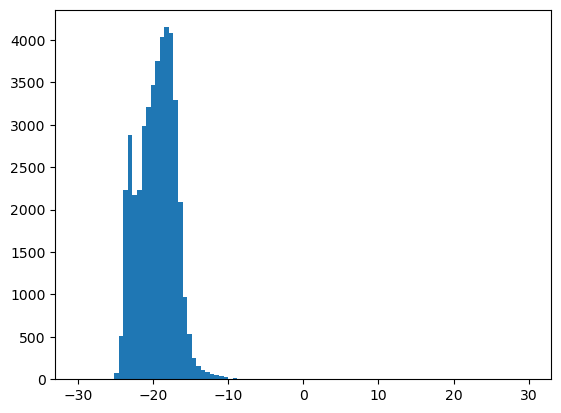

In [22]:
plt.hist(dfclean.temp_diff, bins=np.linspace(-30, 30, 100));

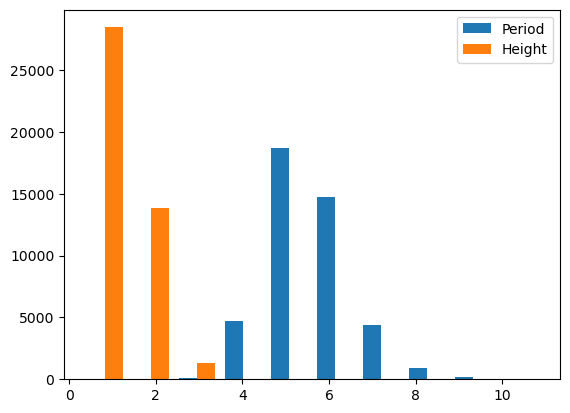

In [23]:
data_list = [dfclean.period, dfclean.height]
label_list = ['Period', 'Height']
plt.hist(data_list, label=label_list)
plt.legend();

In [24]:
# 1. Loop over the column of the dataframe
# and add a column of normalized data for each feature 
# normalized mean: <Xnorm>=0 and STD(Xnorm)=1

# 2. Create a figure with as many subplots as feature
# and plot the distribution of each feature before 
# and after normalization.

# 3. Based on the raw dataset (no cleaning), count the number of waves 
# with -99.9 for each feature.

In [25]:
# 1. Loop and normalize
def normalize(a):
    a_mean = a.mean()
    a_rms = np.sqrt(np.mean((a-a_mean)**2))
    return (a-a_mean / a_rms)

for col in dfclean.columns[1:]:
    dfclean[col+'_norm'] = normalize(dfclean[col])

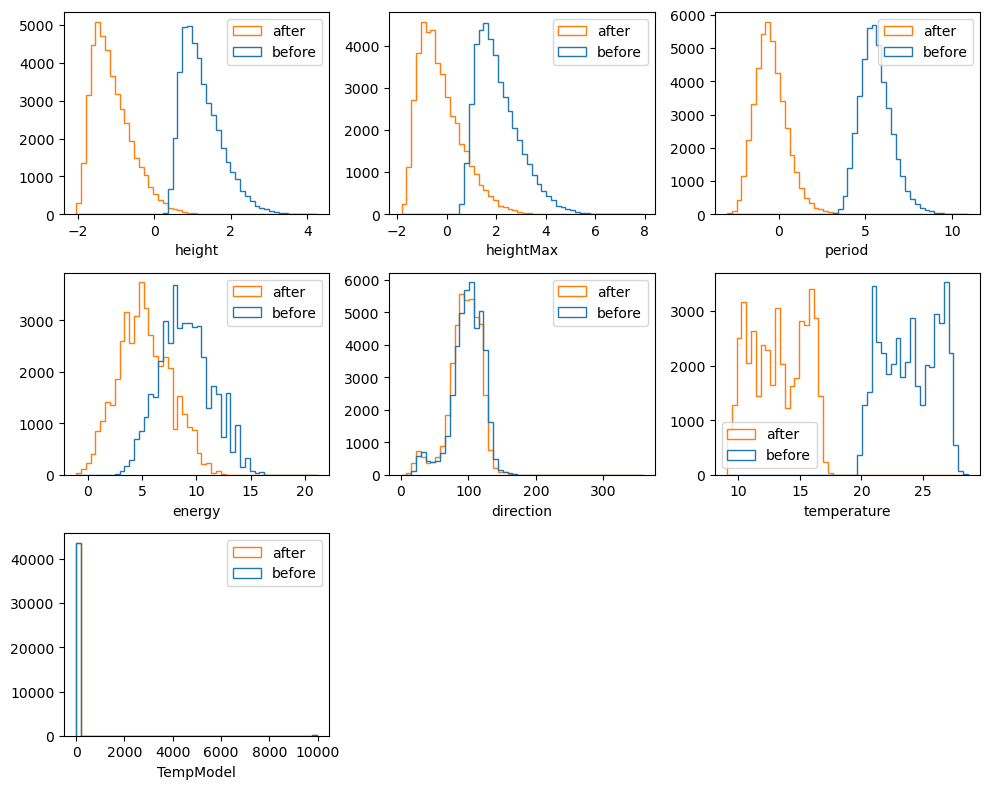

In [28]:
# 3. 
plt.figure(figsize=(10, 8))
for i, col in enumerate(df2.columns[1:]):
    data = [ dfclean[col], dfclean[col+'_norm'] ]
    plt.subplot(3, 3, i+1)
    plt.hist(data, label=['before', 'after'], histtype='step', bins=50)
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()

In [ ]:
# 3. Based on the raw dataset (no cleaning), count the number of waves 
# with -99.9 for each feature.

In [33]:
def count_fraction():
    for c in df2.columns[1:]:
        f = df2[c]
        N = np.count_nonzero(f==-99.9)
        frac = N/f.size *100
        #print(f'{c} has {N} bad waves ({frac:.2f}%)')

In [34]:
%timeit count_fraction()

276 μs ± 3.44 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [35]:
def count_fraction_numpy():
    for c in df2.columns[1:]:
        f = df2[c].values
        N = np.count_nonzero(f==-99.9)
        frac = N/f.size *100
        #print(f'{c} has {N} bad waves ({frac:.2f}%)')

In [36]:
%timeit count_fraction_numpy()

63.2 μs ± 1.11 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
a = df2[['period', 'energy']].to_numpy()
print(a.shape)
df2

(43728, 2)


,date,height,heightMax,period,energy,direction,temperature,TempModel
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90,9981.020111
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90,3.123492
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65,3.145981
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50,3.181601
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45,3.142439
...,...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95,8.098678
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95,7.330991
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95,7.556672
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95,7.175783


In [40]:
df2.loc[2:4, ['height', 'period']]

,height,period
2,0.763,4.520
3,0.770,4.582
4,0.747,4.515


In [47]:
df2.iloc[2:5, [1,3]]

,height,period
2,0.763,4.520
3,0.770,4.582
4,0.747,4.515


In [49]:
dfclean.dropna(inplace=True)

In [51]:
dfclean.head()

,date,height,heightMax,period,energy,direction,temperature,TempModel,temp_diff,height_norm,heightMax_norm,period_norm,energy_norm,direction_norm,temperature_norm,TempModel_norm,temp_diff_norm
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65,3.145981,-22.504019,-1.580082,-1.179954,-1.530993,1.746338,44.937413,14.915372,3.091806,-22.276780
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50,3.181601,-22.318399,-1.573082,-0.919954,-1.468993,1.880338,70.937413,14.765372,3.127426,-22.091161
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45,3.142439,-22.307561,-1.596082,-1.169954,-1.535993,1.316338,86.937413,14.715372,3.088265,-22.080322
5,01/01/2017 02:30,0.718,1.61,4.614,6.181,68.0,25.45,3.201205,-22.248795,-1.625082,-0.719954,-1.436993,2.414338,63.937413,14.715372,3.147031,-22.021556
6,01/01/2017 03:00,0.707,1.34,4.568,4.705,73.0,25.50,3.175889,-22.324111,-1.636082,-0.989954,-1.482993,0.938338,68.937413,14.765372,3.121715,-22.096872


In [53]:
dfclean.iloc[2:5, [1,3]]

,height,period
4,0.747,4.515
5,0.718,4.614
6,0.707,4.568


In [57]:
dfclean.loc[2, ['height', 'period']]

height    0.763
period     4.52
Name: 2, dtype: object

In [59]:
# Get numpy array for further manipulations
T = dfclean['temperature'].values
P = dfclean['period'].values
H = dfclean['heightMax'].values
E = dfclean['energy'].values

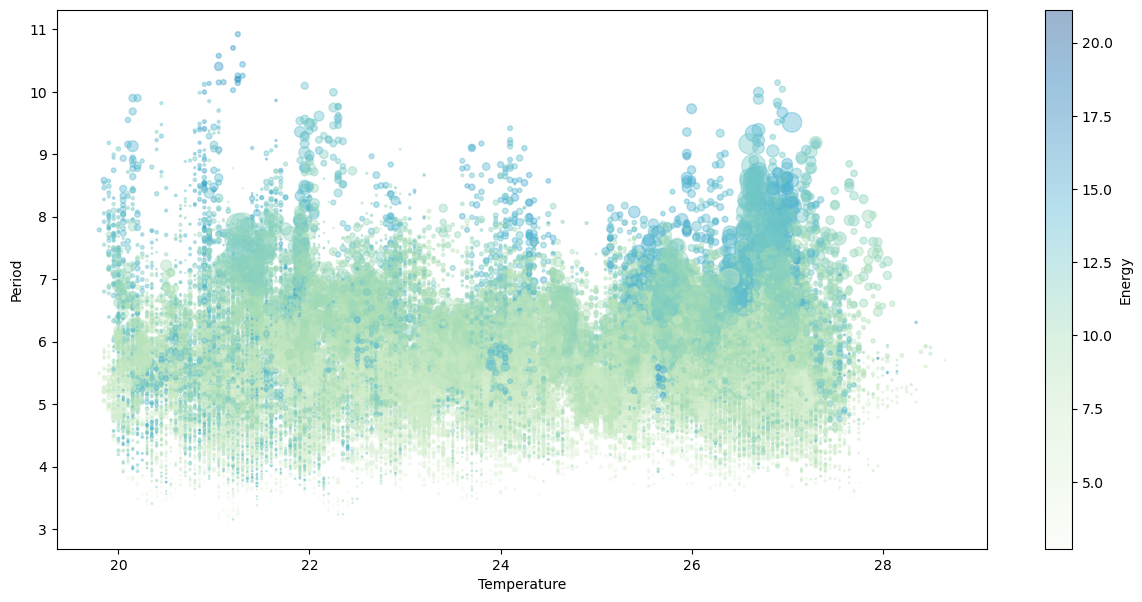

In [60]:
# Plot temperature vs period vs max_height vs energy
plt.figure(figsize=(15, 7))
plt.scatter(T, P , s=H**3, c=E, cmap='GnBu', alpha=0.4)
plt.colorbar(label='Energy')
plt.xlabel('Temperature')
plt.ylabel('Period');

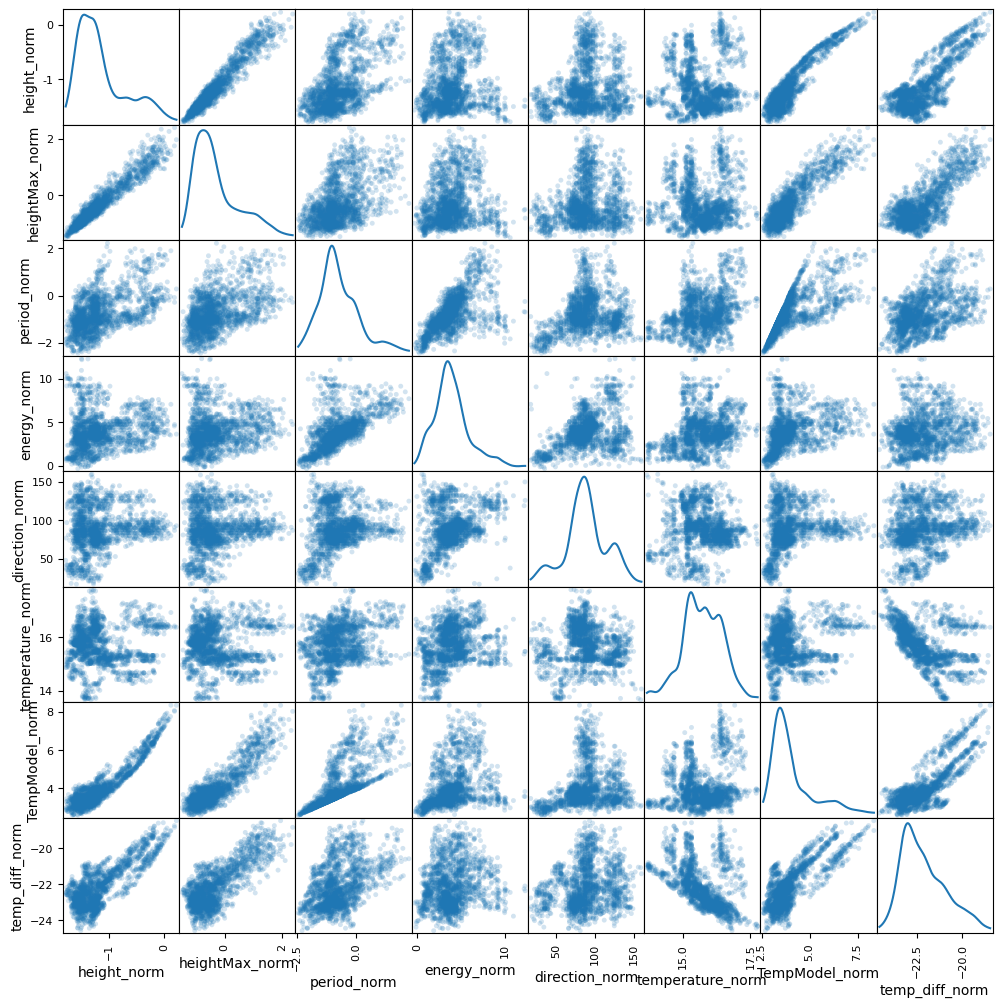

In [63]:
from pandas.plotting import scatter_matrix


(dfclean[[c for c in dfclean.columns if '_norm' in c]][:2000], figsize=(12, 12), alpha=0.2, s=50, diagonal='kde');

In [36]:
import numpy as np
def pol(Xs, *coeff):
    Xs = np.array(Xs)
    terms = np.array([a*Xs**i for i, a in enumerate(coeff)])
    #print(terms.shape)
    return np.sum(terms, axis=0)

In [37]:
pol([1, 2], 1, 2, 3, 4, 5)

array([ 15, 129])

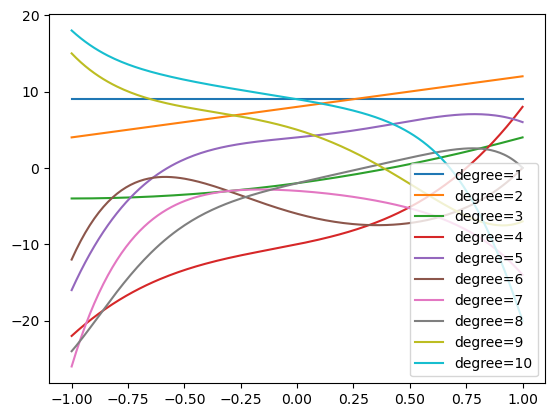

In [43]:
import matplotlib.pyplot as plt
Xs = np.linspace(-1, 1, 200)
plt.figure()
for d in range(10):
    coeff = np.random.randint(low=-10, high=10, size=d+1)
    Ys = pol(Xs, *coeff)
    plt.plot(Xs, Ys, label=f'degree={d+1}')
plt.legend();

In [19]:
Xs = np.linspace(-100, 100, 200)
coeff = np.random.randint(low=-10, high=10, size=5)
Ys = pol(Xs, *coeff)
print(Xs.shape, coeff.shape, type(Ys))

(200,) (5,) <class 'numpy.float64'>
